In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
def compute_fft(image_path, size=(256, 256)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, size)
    fft = np.fft.fft2(img)
    fft_shifted = np.fft.fftshift(fft)
    mag = np.abs(fft_shifted)
    phase = np.angle(fft_shifted)
    return img, fft_shifted, mag, phase



def reconstruct_from_fft(mag, phase):
    complex_img = mag * np.exp(1j * phase)
    inv_shift = np.fft.ifftshift(complex_img)
    reconstructed = np.fft.ifft2(inv_shift)
    
    return np.abs(reconstructed)

def show_and_save_images(img_list, titles, folder, cmap='gray'):
    os.makedirs(folder, exist_ok=True)
    plt.figure(figsize=(12, 5))
    
    for i, (img, title) in enumerate(zip(img_list, titles)):
        plt.subplot(1, len(img_list), i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
        save_path = os.path.join(folder, f"{title.replace(' ', '_')}.png")
        cv2.imwrite(save_path, (img * 255).astype(np.uint8) if img.max() <= 1 else img)
    
    plt.show()

[ WARN:0@0.307] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


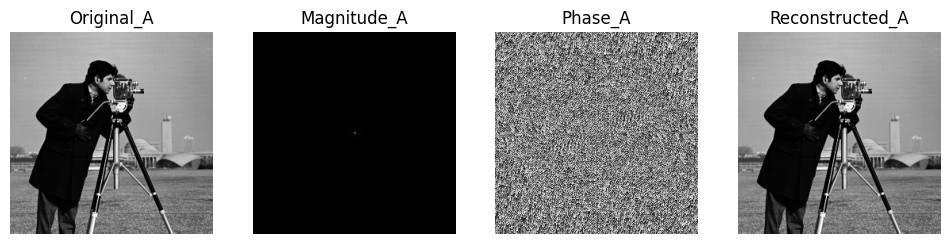

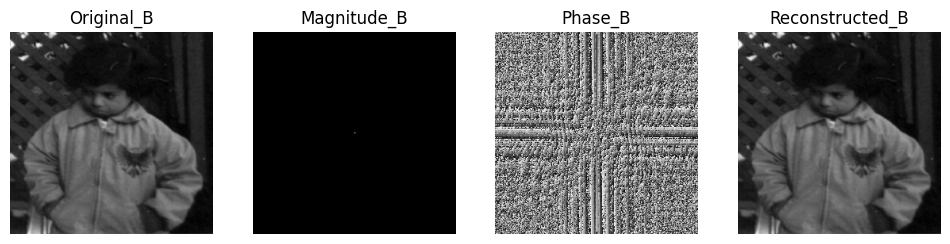

In [3]:

img_A, fft_A, mag_A, phase_A = compute_fft('cameraman.tif')
img_B, fft_B, mag_B, phase_B = compute_fft('pout.tif')

save_folder = "./"
recon_A = reconstruct_from_fft(mag_A, phase_A)
recon_B = reconstruct_from_fft(mag_B, phase_B)

show_and_save_images([img_A, mag_A, phase_A, recon_A], 
                     ['Original_A', 'Magnitude_A', 'Phase_A', 'Reconstructed_A'], save_folder)

show_and_save_images([img_B, mag_B, phase_B, recon_B], 
                     ['Original_B', 'Magnitude_B', 'Phase_B', 'Reconstructed_B'], save_folder)

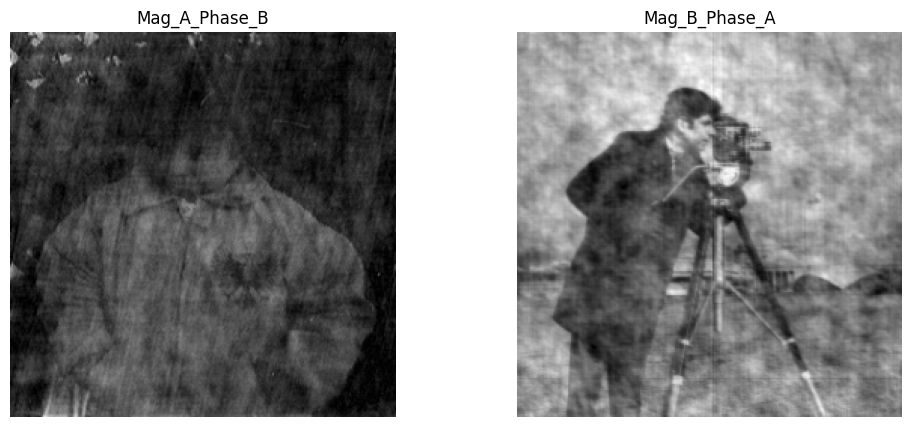

Images saved in folder: ./


In [4]:
swap_A_B = reconstruct_from_fft(mag_A, phase_B)
swap_B_A = reconstruct_from_fft(mag_B, phase_A)

show_and_save_images([swap_A_B, swap_B_A], 
                     ['Mag_A_Phase_B', 'Mag_B_Phase_A'], save_folder)

print(f"Images saved in folder: {save_folder}")
